## 3D Audio Assignment 2

### Load Audio

In [1]:
import librosa
import soundfile as sf

# Load binaural recording (L and R channel)
binaural_audio_L, sr = librosa.load('3D_audio_A2_Audio/Bobst_Binural_Split.L.wav', sr=44100)
binaural_audio_R, sr = librosa.load('3D_audio_A2_Audio/Bobst_Binural_Split.R.wav', sr=44100)

In [2]:
# Load virtual recording
virtual_water_dripping, sr = librosa.load('virtual sound/07031075.wav', sr=44100)
virtual_footstep_sand, sr = librosa.load('virtual sound/07004171.wav', sr=44100)
virtual_silent_rain, sr = librosa.load('virtual sound/NHU05047154.wav', sr=44100)
virtual_loud_rain, sr = librosa.load('virtual sound/NHU05072086.wav', sr=44100)
virtual_fire_engine, sr = librosa.load('virtual sound/07025157.wav', sr=44100)
virtual_crab_sand, sr = librosa.load('virtual sound/NHU05078135.wav', sr=44100)
virtual_police_alarm, sr = librosa.load('virtual sound/07045267.wav', sr=44100)
virtual_airplane_seabirds, sr = librosa.load('virtual sound/436040__arnaud-coutancier__airplane-and-seagulls.wav', sr=44100)
virtual_seawash_1, sr = librosa.load('virtual sound/07012149.wav', sr=44100)
virtual_seawash_2loud, sr = librosa.load('virtual sound/07044106.wav', sr=44100)
virtual_wind, sr = librosa.load('virtual sound/NHU10217571.wav', sr=44100)

### Apply Binaural Processing with HRTF

In [3]:
%pip install pysofaconventions

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pysofaconventions as sofa

# Load HRTF dataset (SOFA format)
sofa_file = sofa.SOFAFile('/Users/mona/Desktop/NYU Mtech/24 fall/3D audio/3D-audio---assignment-2/Database-Master_V1-4/D1/D1_HRIR_SOFA/D1_44K_16bit_256tap_FIR_SOFA.sofa', 'r')


In [5]:
import numpy as np
from scipy.signal import convolve
# Load left and right channel mono files
left_channel_ir, sr_left = librosa.load('3D_audio_A2_Audio/Bobst_clap_split.L.wav', sr=44100, mono=True)
right_channel_ir, sr_right = librosa.load('3D_audio_A2_Audio/Bobst_clap_split.R.wav', sr=44100, mono=True)

# Define a maximum length for the IR to limit reverb
max_ir_length = 50000  # Adjust this value based on your needs

# Trim the IR if necessary
left_channel_ir = left_channel_ir[:max_ir_length]
right_channel_ir = right_channel_ir[:max_ir_length]

# Ensure both channels have the same sample rate (should be, but just in case)
if sr_left != sr_right:
    raise ValueError("Sample rates of the left and right channels do not match!")

# Combine the mono left and right channels into a stereo file (2-channel)
stereo_ir = np.array([left_channel_ir, right_channel_ir])

# Now, stereo_ir is your stereo IR (impulse response) from the left and right channels
print("Stereo IR Shape:", stereo_ir.shape)  # Should be (2, num_samples)

Stereo IR Shape: (2, 50000)


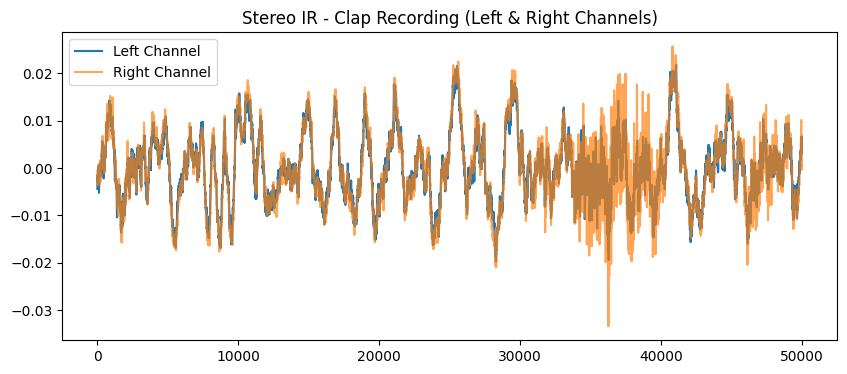

In [6]:
import matplotlib.pyplot as plt

# Plot the left and right channels
plt.figure(figsize=(10, 4))
plt.plot(stereo_ir[0], label='Left Channel')
plt.plot(stereo_ir[1], label='Right Channel', alpha=0.7)
plt.legend()
plt.title("Stereo IR - Clap Recording (Left & Right Channels)")
plt.show()

In [7]:
import pysofaconventions as sofa
from netCDF4 import Dataset

# Load the SOFA file
sofa_file = sofa.SOFAFile('/Users/mona/Desktop/NYU Mtech/24 fall/3D audio/3D-audio---assignment-2/Database-Master_V1-4/D1/D1_HRIR_SOFA/D1_44K_16bit_256tap_FIR_SOFA.sofa', 'r')

# Use netCDF4 to inspect the SOFA file variables
ncfile = Dataset('/Users/mona/Desktop/NYU Mtech/24 fall/3D audio/3D-audio---assignment-2/Database-Master_V1-4/D1/D1_HRIR_SOFA/D1_44K_16bit_256tap_FIR_SOFA.sofa', 'r')

# List all the variables in the SOFA file
print(ncfile.variables.keys())


dict_keys(['ListenerPosition', 'ReceiverPosition', 'SourcePosition', 'EmitterPosition', 'ListenerUp', 'ListenerView', 'Data.IR', 'Data.SamplingRate', 'Data.Delay'])


In [15]:
import numpy as np
import soundfile as sf
from scipy.signal import convolve
import pysofaconventions as sofa
import librosa
from netCDF4 import Dataset

# Load the SOFA file
sofa_file = sofa.SOFAFile('/Users/mona/Desktop/NYU Mtech/24 fall/3D audio/3D-audio---assignment-2/Database-Master_V1-4/D1/D1_HRIR_SOFA/D1_44K_16bit_256tap_FIR_SOFA.sofa', 'r')

# Use netCDF4 to inspect the SOFA file variables
ncfile = Dataset('/Users/mona/Desktop/NYU Mtech/24 fall/3D audio/3D-audio---assignment-2/Database-Master_V1-4/D1/D1_HRIR_SOFA/D1_44K_16bit_256tap_FIR_SOFA.sofa', 'r')

# Assuming 'SourcePosition' is the variable for azimuth/elevation information
positions = ncfile.variables['SourcePosition'][:]  # Adjust this variable if it's different
azimuths = positions[:, 0]  # First column is azimuth
elevations = positions[:, 1]  # Second column is elevation

# Define target azimuth and elevation for virtual piano sound
target_azimuth = -45
target_elevation = 60  

# Find the closest matching index in the dataset
azimuth_diff = np.abs(azimuths - target_azimuth)
elevation_diff = np.abs(elevations - target_elevation)
index = np.argmin(azimuth_diff + elevation_diff)

# Retrieve the HRTF data for the found index
hrtf_data = sofa_file.getDataIR()[index]

# Load the virtual sound (piano) - assuming it's in mono
virtual_piano1, sr = librosa.load('07070171.wav', sr=44100, mono=True)

# Load the stereo IR (left and right channels) for room simulation
stereo_ir_left, sr_left = librosa.load('3D_audio_A2_Audio/Bobst_clap_split.L.wav', sr=44100, mono=True)
stereo_ir_right, sr_right = librosa.load('3D_audio_A2_Audio/Bobst_clap_split.R.wav', sr=44100, mono=True)
stereo_ir = np.array([stereo_ir_left, stereo_ir_right])

# First, convolve the virtual sound (piano) with the HRTF data for both ears (left and right)
virtual_piano1_L_hrtf = convolve(virtual_piano1, hrtf_data[0], mode='full')[:len(virtual_piano1)]
virtual_piano1_R_hrtf = convolve(virtual_piano1, hrtf_data[1], mode='full')[:len(virtual_piano1)]

# Second, convolve the HRTF-processed sound with the room's impulse response (stereo IR)
virtual_piano1_L_final = convolve(virtual_piano1_L_hrtf, stereo_ir[0], mode='same')[:len(virtual_piano1)]
virtual_piano1_R_final = convolve(virtual_piano1_R_hrtf, stereo_ir[1], mode='same')[:len(virtual_piano1)]

reverb_gain = 0.5  # Adjust this based on your preference
virtual_piano1_L_final *= reverb_gain
virtual_piano1_R_final *= reverb_gain

# Combine the left and right channels into a stereo file
binaural_virtual_piano1 = np.array([virtual_piano1_L_final, virtual_piano1_R_final])

# Simulate distance by applying gain (inverse square law)
distance = 20  # distance in meters
gain = 1 / (distance ** 2)  # reduce amplitude based on distance
binaural_virtual_piano1 *= gain

# Normalize the final result to prevent clipping
binaural_virtual_piano1 /= np.max(np.abs(binaural_virtual_piano1))

# Save the final blended binaural output to a WAV file
sf.write('outdoor_final_blended_binaural_output.wav', binaural_virtual_piano1.T, sr)


In [16]:
import numpy as np
import librosa
import soundfile as sf

# Load binaural recording (L and R channel)
binaural_audio_L, sr = librosa.load('3D_audio_A2_Audio/Bobst_Binural_Split.L.wav', sr=44100)
binaural_audio_R, sr = librosa.load('3D_audio_A2_Audio/Bobst_Binural_Split.R.wav', sr=44100)

# Ensure both channels have the same length (trim the longer one)
min_len = min(len(binaural_audio_L), len(binaural_audio_R))
binaural_audio_L = binaural_audio_L[:min_len]
binaural_audio_R = binaural_audio_R[:min_len]

# Calculate the number of samples for 3 minutes (3 minutes * 60 seconds/minute * sample rate)
three_min_samples = 3 * 60 * sr

# Trim the stereo audio to 3 minutes
binaural_audio_L = binaural_audio_L[:three_min_samples]
binaural_audio_R = binaural_audio_R[:three_min_samples]

# Combine the left and right channels into a stereo file (2D array)
stereo_audio = np.array([binaural_audio_L, binaural_audio_R])

# Transpose to get shape (samples, 2) instead of (2, samples)
stereo_audio = stereo_audio.T

# Save the stereo file
sf.write('Bobst_binaural_final_output.wav', stereo_audio, sr)


In [ ]:
import numpy as np
import soundfile as sf

# Load the binaural recording (stereo)
binaural_audio, sr_binaural = sf.read('Bobst_binaural_final_output.wav')

# Load the final blended virtual sounds (fire engine, police alarm, water dripping, pianos, outdoor, clock)
fire_engine_sound, sr_fire_engine = sf.read('fire_engine_final_blended_binaural_output.wav')
police_alarm_sound, sr_police_alarm = sf.read('police_alarm_final_blended_binaural_output.wav')
water_dripping_sound, sr_water_dripping = sf.read('water_dripping_final_blended_binaural_output.wav')
piano1_sound, sr_piano1 = sf.read('piano1_final_blended_binaural_output.wav')
piano2_sound, sr_piano2 = sf.read('piano2_final_blended_binaural_output.wav')
piano3_sound, sr_piano3 = sf.read('piano3_final_blended_binaural_output.wav')
outdoor_sound, sr_outdoor = sf.read('outdoor_final_blended_binaural_output.wav')
clock_sound, sr_clock = sf.read('clock_final_blended_binaural_output.wav')

# Ensure all sounds have the same sample rate
assert sr_binaural == sr_fire_engine == sr_police_alarm == sr_water_dripping == sr_piano1 == sr_piano2 == sr_piano3 == sr_outdoor == sr_clock

# Define timestamps (in seconds) where each sound should appear in the binaural recording
fire_engine_start_time = 76
police_alarm_start_time = 45
water_dripping_start_time = 15
piano1_start_time = 68
piano2_start_time = 0
piano3_start_time = 121
outdoor_start_time = 120
clock_start_time = 160

# Convert timestamps to sample indices
fire_engine_start_sample = int(fire_engine_start_time * sr_binaural)
police_alarm_start_sample = int(police_alarm_start_time * sr_binaural)
water_dripping_start_sample = int(water_dripping_start_time * sr_binaural)
piano1_start_sample = int(piano1_start_time * sr_binaural)
piano2_start_sample = int(piano2_start_time * sr_binaural)
piano3_start_sample = int(piano3_start_time * sr_binaural)
outdoor_start_sample = int(outdoor_start_time * sr_binaural)
clock_start_sample = int(clock_start_time * sr_binaural)

# Create empty arrays for each sound with the same length as the binaural recording
fire_engine_padded = np.zeros_like(binaural_audio)
police_alarm_padded = np.zeros_like(binaural_audio)
water_dripping_padded = np.zeros_like(binaural_audio)
piano1_padded = np.zeros_like(binaural_audio)
piano2_padded = np.zeros_like(binaural_audio)
piano3_padded = np.zeros_like(binaural_audio)
outdoor_padded = np.zeros_like(binaural_audio)
clock_padded = np.zeros_like(binaural_audio)

# Check the length of each sound and trim it to fit within the available space in the binaural recording
def fit_sound(sound, start_sample, target_length):
    return sound[:min(len(sound), target_length - start_sample)]

# Insert the virtual sounds at the desired timestamps by adding them to the empty arrays
fire_engine_padded[fire_engine_start_sample:fire_engine_start_sample+len(fit_sound(fire_engine_sound, fire_engine_start_sample, len(binaural_audio)))] = fire_engine_sound
police_alarm_padded[police_alarm_start_sample:police_alarm_start_sample+len(fit_sound(police_alarm_sound, police_alarm_start_sample, len(binaural_audio)))] = police_alarm_sound
water_dripping_padded[water_dripping_start_sample:water_dripping_start_sample+len(fit_sound(water_dripping_sound, water_dripping_start_sample, len(binaural_audio)))] = water_dripping_sound
piano1_padded[piano1_start_sample:piano1_start_sample+len(fit_sound(piano1_sound, piano1_start_sample, len(binaural_audio)))] = piano1_sound
piano2_padded[piano2_start_sample:piano2_start_sample+len(fit_sound(piano2_sound, piano2_start_sample, len(binaural_audio)))] = piano2_sound
piano3_padded[piano3_start_sample:piano3_start_sample+len(fit_sound(piano3_sound, piano3_start_sample, len(binaural_audio)))] = piano3_sound
outdoor_padded[outdoor_start_sample:outdoor_start_sample+len(fit_sound(outdoor_sound, outdoor_start_sample, len(binaural_audio)))] = outdoor_sound
clock_padded[clock_start_sample:clock_start_sample+len(fit_sound(clock_sound, clock_start_sample, len(binaural_audio)))] = clock_sound

# Blend (add) all the virtual sounds into the binaural recording
final_mix = (
    binaural_audio 
    + fire_engine_padded 
    + police_alarm_padded 
    + water_dripping_padded 
    + piano1_padded 
    + piano2_padded 
    + piano3_padded 
    + outdoor_padded 
    + clock_padded
)

# Normalize the final result to prevent clipping
final_mix /= np.max(np.abs(final_mix))

# Save the final blended binaural output to a WAV file
sf.write('final_binaural_with_virtual_sounds.wav', final_mix, sr_binaural)
